In [2]:
import skimage.io
from skimage.color import rgba2rgb, rgb2gray
from skimage.feature import hog
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [3]:
def process_image(radius_bins, angle_bins, image_path):
    image = skimage.io.imread(image_path)

    # Convert RGBA to RGB if needed
    if image.shape[-1] == 4:
        image = rgba2rgb(image)

    # Convert RGB to grayscale
    gray_image = rgb2gray(image)

    # Resize the image for easier processing (optional step)
    resized_image = resize(gray_image, (500, 500))

    # Calculate HOG features
    hog_features, hog_image = hog(
        resized_image,
        orientations=angle_bins,
        pixels_per_cell=(radius_bins, radius_bins),
        cells_per_block=(2, 2),
        visualize=True,
        channel_axis=None,
    )

    # pca = PCA(svd_solver='arpack')
    # reduced_features = pca.fit_transform(hog_features.reshape(1, -1))

    # Display original and HOG images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.axis("off")
    ax1.imshow(resized_image, cmap=plt.cm.gray)
    ax1.set_title("Resized Coin Image")

    ax2.axis("off")
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title("HOG Visualization")

    plt.show()

    return hog_features

In [4]:
# process_image(radius_bins=8, angle_bins=9, image_path="data/image.png").shape

In [5]:
def extract_features(image, radius_bins, angle_bins):

    # Calculate HOG features
    hog_features, hog_image = hog(
        image,
        orientations=angle_bins,
        pixels_per_cell=(radius_bins, radius_bins),
        cells_per_block=(2, 2),
        visualize=True,
        channel_axis=None,
    )

    # pca = PCA(svd_solver='arpack')
    # reduced_features = pca.fit_transform(hog_features.reshape(1, -1))

    # Display original and HOG images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.axis("off")
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title("Resized Coin Image")

    ax2.axis("off")
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title("HOG Visualization")

    plt.show()

    return hog_features

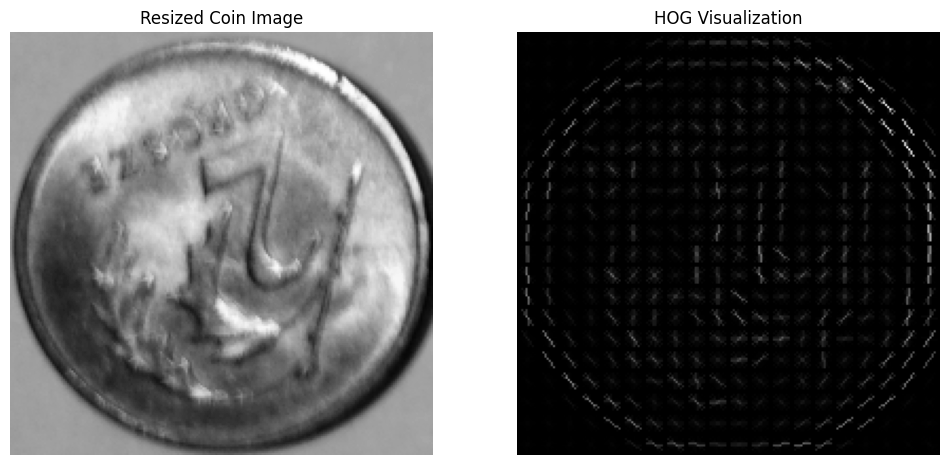

(11552,)


In [14]:
from aoc.utils import extract_coin, gaussuian_mask, convolve_mask

image_path = "data/20241117_213835.jpg"
image = skimage.io.imread(image_path)

resize_shape = (200, 200)
bounding_box = (330, 940, 970, 1590)
mask_sigma = 15

image = extract_coin(image, bounding_box, resize_shape)
mask = gaussuian_mask(resize_shape, mask_sigma)
filtered = convolve_mask(image, mask)
features = extract_features(image, 10, 8)
print(features.shape)

In [ ]:
features.shape

(20736,)